In [ ]:
pip install --upgrade numerapi

In [ ]:
import numerapi
# some API calls do not require logging in
napi = numerapi.NumerAPI(verbosity="info")


In [ ]:
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)


DATA_VERSION = "v5.0"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

Available versions:
 ['v5.0']
Available v5.0 files:
 ['v5.0/features.json', 'v5.0/live.parquet', 'v5.0/live_benchmark_models.parquet', 'v5.0/live_example_preds.csv', 'v5.0/live_example_preds.parquet', 'v5.0/meta_model.parquet', 'v5.0/train.parquet', 'v5.0/train_benchmark_models.parquet', 'v5.0/validation.parquet', 'v5.0/validation_benchmark_models.parquet', 'v5.0/validation_example_preds.csv', 'v5.0/validation_example_preds.parquet']


In [ ]:
import json

# download the feature metadata file
napi.download_dataset(f"{DATA_VERSION}/features.json")

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

v5.0/features.json: 291kB [00:00, 7.58MB/s]                   

feature_sets 17
targets 37


In [ ]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 705
all 2376


In [ ]:
import pandas as pd

# Define our feature set
feature_set = feature_sets["small"]
# use "medium" or "all" for better performance. Requires more RAM.
# features = feature_metadata["feature_sets"]["medium"]
# features = feature_metadata["feature_sets"]["all"]

# Download the training data
napi.download_dataset(f"{DATA_VERSION}/train.parquet")


train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era", "target"] + feature_set
)


train = train[train["era"].isin(train["era"].unique()[::4])]

v5.0/train.parquet: 2.37GB [01:05, 35.9MB/s]                            


In [ ]:
train


,era,target,feature_antistrophic_striate_conscriptionist,feature_bicameral_showery_wallaba,feature_bridal_fingered_pensioner,feature_collectivist_flaxen_gueux,feature_concurring_fabled_adapter,feature_crosscut_whilom_ataxy,feature_departmental_inimitable_sentencer,feature_dialectal_homely_cambodia,...,feature_tridactyl_immoral_snorting,feature_trimeter_soggy_greatest,feature_unanalyzable_excusable_whirlwind,feature_unbreakable_constraining_hegelianism,feature_unformed_bent_smatch,feature_unministerial_unextenuated_teleostean,feature_unmodish_zymogenic_rousing,feature_unsystematized_subcardinal_malaysia,feature_willful_sere_chronobiology,feature_zoological_peristomial_scute
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,0.25,2,2,2,2,2,0,1,2,...,4,1,1,3,0,2,2,3,3,2
n003bba8a98662e4,0001,0.25,2,2,2,2,2,1,4,2,...,4,2,0,0,0,2,2,4,4,2
n003bee128c2fcfc,0001,0.75,2,2,2,2,2,2,2,2,...,3,1,1,0,1,2,2,0,3,2
n0048ac83aff7194,0001,0.25,2,2,2,2,2,1,4,2,...,1,3,4,1,2,2,2,2,0,2
n0055a2401ba6480,0001,0.25,2,2,2,2,2,0,0,2,...,1,0,1,0,0,2,2,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.00,1,2,1,0,3,2,1,1,...,2,2,1,2,3,3,3,2,2,1
nffc9844c1c7a6a9,0573,0.25,2,1,2,1,4,2,2,4,...,4,0,0,3,1,3,3,2,3,2
nffd79773f4109bb,0573,0.50,3,4,0,3,4,1,0,1,...,3,0,0,0,1,1,4,0,1,2


<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

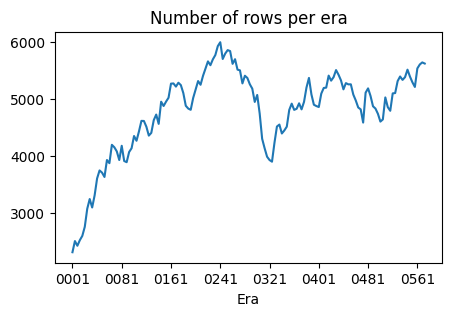

In [ ]:
# Plot the number of rows per era
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)


<Axes: title={'center': 'Target'}, xlabel='Value', ylabel='Frequency'>

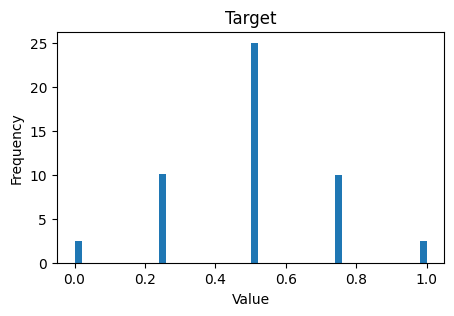

In [ ]:
# Plot density histogram of the target
train["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)


<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

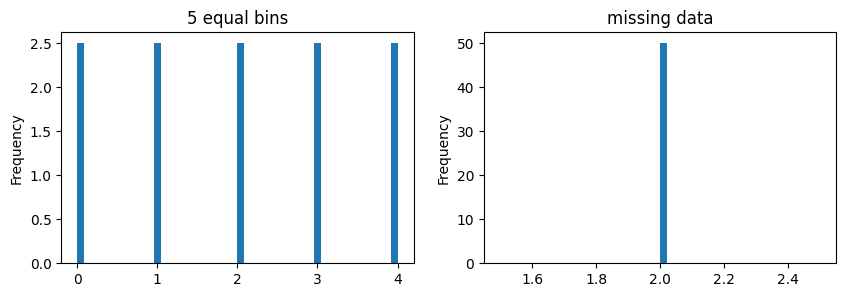

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
first_era = train[train["era"] == train["era"].unique()[0]]
last_era = train[train["era"] == train["era"].unique()[-1]]
last_era[feature_set[-1]].plot(
   title="5 equal bins",
   kind="hist",
   density=True,
   bins=50,
   ax=ax1
)
first_era[feature_set[-1]].plot(
   title="missing data",
   kind="hist",
   density=True,
   bins=50,
   ax=ax2
)

In [ ]:

import lightgbm as lgb


model = lgb.LGBMRegressor(
  n_estimators=30000,
  learning_rate=0.001,
  max_depth=10,
  num_leaves=2**10,
  colsample_bytree=0.1,
  min_data_in_leaf=10000,
)

model.fit(
  train[feature_set],
  train["target"]
)

A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMRegressor(colsample_bytree=0.1, learning_rate=0.001, max_depth=10,
              min_data_in_leaf=10000, n_estimators=30000, num_leaves=1024)

In [ ]:
# Download validation data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/validation.parquet")

# Load the validation data and filter for data_type == "validation"
validation = pd.read_parquet(
    f"{DATA_VERSION}/validation.parquet",
    columns=["era", "data_type", "target"] + feature_set
)
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]

# Downsample to every 4th era to reduce memory usage and speedup evaluation (suggested for Colab free tier)
# Comment out the line below to use all the data (slower and higher memory usage, but more accurate evaluation)
validation = validation[validation["era"].isin(validation["era"].unique()[::4])]

# Eras are 1 week apart, but targets look 20 days (o 4 weeks/eras) into the future,
# so we need to "embargo" the first 4 eras following our last train era to avoid "data leakage"
last_train_era = int(train["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]



v5.0/validation.parquet: 3.46GB [01:20, 43.0MB/s]                            


In [ ]:
# Generate predictions against the out-of-sample validation features

validation["prediction"] = model.predict(validation[feature_set])
validation[["era", "prediction", "target"]]

[LightGBM] [Warning] min_data_in_leaf is set=10000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10000


,era,prediction,target
id,,,
n000c290e4364875,0579,0.495627,0.50
n002a15bc5575bbb,0579,0.520867,0.25
n00309caaa0f955e,0579,0.519491,0.75
n0039cbdcf835708,0579,0.511988,0.50
n004143458984f89,0579,0.484002,0.50
...,...,...,...
nffc65437bf3764a,1171,0.502231,0.50
nffcb23ed5f165ff,1171,0.501312,0.50
nffd45721ae3872c,1171,0.489527,0.75


In [ ]:

!pip install -q --no-deps numerai-tools


from numerai_tools.scoring import numerai_corr, correlation_contribution


napi.download_dataset(f"v4.3/meta_model.parquet", round_num=842)
validation["meta_model"] = pd.read_parquet(
    f"v4.3/meta_model.parquet"
)["numerai_meta_model"]

v4.3/meta_model.parquet: 29.0MB [00:00, 37.5MB/s]                            


/tmp/ipython-input-15-295801370.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr = validation.groupby("era").apply(
/tmp/ipython-input-15-295801370.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_mmc = validation.dropna().groupby("era").apply(


<Axes: title={'center': 'Validation MMC'}, xlabel='era'>

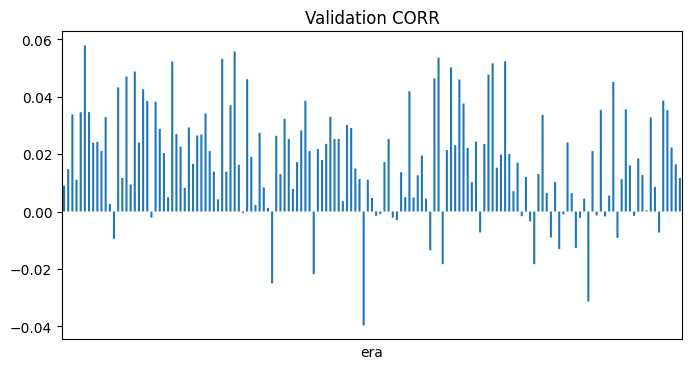

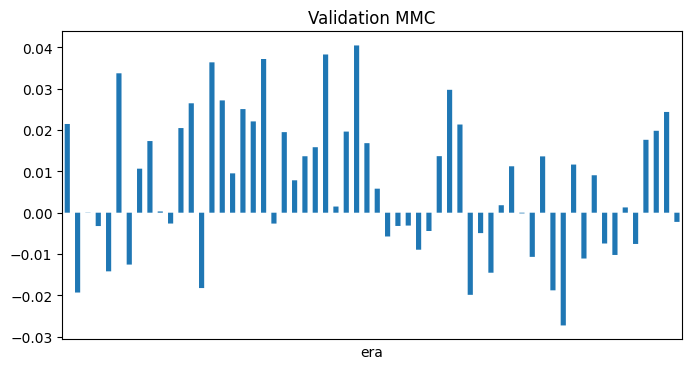

In [ ]:
# Compute the per-era corr between our predictions and the target values
per_era_corr = validation.groupby("era").apply(
    lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
)

# Compute the per-era mmc between our predictions, the meta model, and the target values
per_era_mmc = validation.dropna().groupby("era").apply(
    lambda x: correlation_contribution(x[["prediction"]], x["meta_model"], x["target"])
)


# Plot the per-era correlation
per_era_corr.plot(
  title="Validation CORR",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)
per_era_mmc.plot(
  title="Validation MMC",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)

<Axes: title={'center': 'Cumulative Validation MMC'}, xlabel='era'>

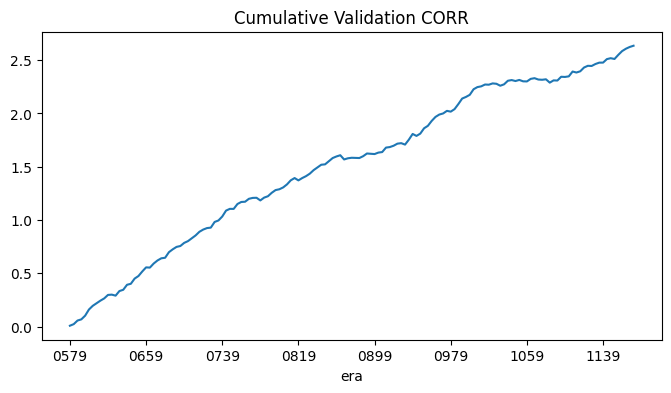

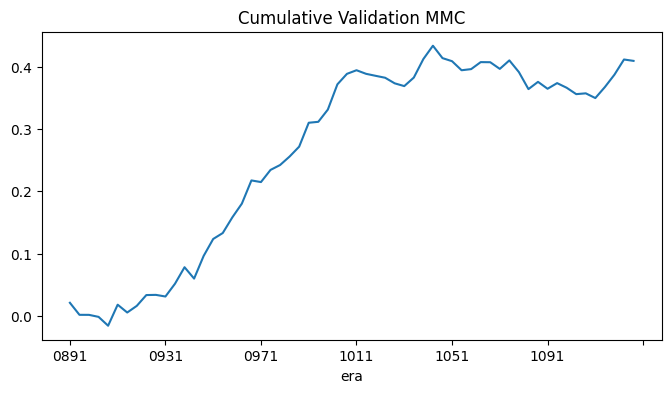

In [ ]:
# Plot the cumulative per-era correlation
per_era_corr.cumsum().plot(
  title="Cumulative Validation CORR",
  kind="line",
  figsize=(8, 4),
  legend=False
)
per_era_mmc.cumsum().plot(
  title="Cumulative Validation MMC",
  kind="line",
  figsize=(8, 4),
  legend=False
)

In [ ]:
# Compute performance metrics
corr_mean = per_era_corr.mean()
corr_std = per_era_corr.std(ddof=0)
corr_sharpe = corr_mean / corr_std
corr_max_drawdown = (per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

mmc_mean = per_era_mmc.mean()
mmc_std = per_era_mmc.std(ddof=0)
mmc_sharpe = mmc_mean / mmc_std
mmc_max_drawdown = (per_era_mmc.cumsum().expanding(min_periods=1).max() - per_era_mmc.cumsum()).max()

pd.DataFrame({
    "mean": [corr_mean, mmc_mean],
    "std": [corr_std, mmc_std],
    "sharpe": [corr_sharpe, mmc_sharpe],
    "max_drawdown": [corr_max_drawdown, mmc_max_drawdown]
}, index=["CORR", "MMC"]).T

,CORR,MMC
mean,prediction 0.01769 dtype: float64,prediction 0.00682 dtype: float64
std,prediction 0.018737 dtype: float64,prediction 0.016557 dtype: float64
sharpe,prediction 0.944146 dtype: float64,prediction 0.411875 dtype: float64
max_drawdown,prediction 0.041737 dtype: float64,prediction 0.083879 dtype: float64


In [ ]:
# Download latest live features
napi.download_dataset(f"{DATA_VERSION}/live.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live.parquet", columns=feature_set)

# Generate live predictions
live_predictions = model.predict(live_features[feature_set])

# Format submission
pd.Series(live_predictions, index=live_features.index).to_frame("prediction")

v5.0/live.parquet: 8.15MB [00:00, 56.8MB/s]                            


[LightGBM] [Warning] min_data_in_leaf is set=10000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10000


,prediction
id,
n0025b87e62c3ebd,0.504338
n0042994aae72acb,0.508864
n005a73529aa2e34,0.491418
n005e1117f5be470,0.499082
n006b357352986ed,0.519729
...,...
nffee3d5f5b9014f,0.489364
nfff2f4ee9635016,0.480264
nfff8e8b3e699a34,0.514337


In [ ]:
# Define your prediction pipeline as a function
def predict(live_features: pd.DataFrame) -> pd.DataFrame:
    live_predictions = model.predict(live_features[feature_set])
    submission = pd.Series(live_predictions, index=live_features.index)
    return submission.to_frame("prediction")

In [ ]:

import cloudpickle
p = cloudpickle.dumps(predict)
with open("NumerAI_firstModel.pkl", "wb") as f:
    f.write(p)

In [ ]:

try:
    from google.colab import files
    files.download('NumerAI_firstModel.pkl')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>